In [7]:
print('||','\u0950',' Om Namo Shivay','\u0950','||')
print('|| Shri ||')

|| ॐ  Om Namo Shivay ॐ ||
|| Shri ||


In [8]:
# import necessary libraries

import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib.pyplot as plt

In [50]:
#  set some constants
Image_size=(256,256) 
# Epochs=50
channels=3
Batch_size=32

In [10]:
# load dataset from directory into dataset>> here we created dataset from data stored in memory.

In [11]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\welcome\Desktop\grapevine_project\grapewine disease\Grape\Grape',
     batch_size=Batch_size,
    image_size=Image_size,
    shuffle=True)


Found 4062 files belonging to 4 classes.


In [12]:
# view Class name of disease variety

In [13]:
class_names=dataset.class_names
class_names

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [14]:
len(dataset)

127

In [15]:
127*32


4064

In [16]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 3 2 0 0 2 1 1 1 2 1 2 2 2 3 2 0 1 0 2 3 2 1 0 0 1 1 1 1 0 1 1]


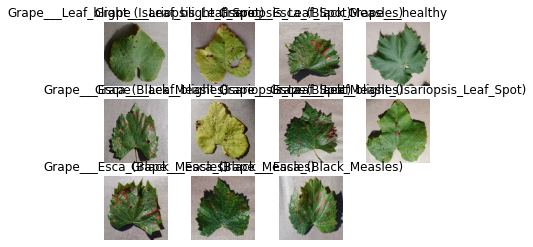

In [18]:
for image_batch,label_batch in dataset.take(1):
    for i in range(0,11):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [19]:
#split the data
# 80% training
# 10% validation
# 10% test >> after the 50 epochs to test model performance

In [20]:
# 80% dataset ==  training on  101 items from 127 images/// 

In [21]:
train_size=.8
train_size=len(dataset)*train_size
train_size

101.60000000000001

In [22]:
train_ds=dataset.take(101)
len(train_ds)

101

In [23]:
# test dataset further divided into tst and validation dataset

In [24]:
test_ds=dataset.skip(101) # it skips 1st 101 images >> same as [101:end]
len(test_ds)

26

In [25]:
val_ds=test_ds.take(13)
len(val_ds)

13

In [26]:
test_ds=test_ds.skip(13)
len(test_ds)

13

In [27]:
# data spliting using functions

In [28]:
def data_split(ds,train_split=0.8,val_split=.1,test_split=.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split* ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=val_ds.skip(val_size)
    
    # val_size=int( val_split* ds_size)
    # test_size=int( test_split* ds_size)
    return train_ds,val_ds, test_ds

In [29]:
data_split(dataset)

(<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [30]:
len(test_ds)

13

In [31]:
# create tensorflow input pipeline.
# prefetch: when GPU processes data ,CPU do not sit idle. It helps to optimize performance
# cache: It reduces Redundacy like loading, reading of data into CPU.

In [32]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
# data preprocessment starts

In [34]:
# resizing and resccaling image
# we want resize image beacuse input image may have differnt dimensions than trained one
# we need rescaling of image because image size varies from 0 to 255
# need to between 0 to 1 beacuse model performs better on same scale data

In [57]:
# create layer of Resizing and Rescaling
resize_and_rescaling=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)])
    

In [52]:
#create layer of data Augementation for making model robust
data_augementation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)])

In [53]:
# # model training
n_classes=len(class_names)
# # Channels=3
# input_shape=(Batch_size,(Image_size,Image_size),channels)

In [38]:
# we create convolutional Neural Network by using
# fisrt 2 layers are resizing & rescaling,and data augumentation.
# we selected layers on the baisis of trial and error.
#Convolutional layers is follwed by Maxpooling. The reason maxpooling selected was
# after we flatten the layer and last layer is of classification layer.

In [54]:
Image_size=256 
# Epochs=50
channels=3
Batch_size=32

In [58]:
Input_shape=(Batch_size,Image_size,Image_size,channels)
model=models.Sequential([resize_and_rescaling,data_augementation,
                        layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(n_classes,activation='softmax')
                                     ])


In [59]:
model.build(input_shape=Input_shape)

In [60]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [62]:
history = model.fit(train_ds,epochs=10,  batch_size=Batch_size,verbose=1, 
                    validation_data=val_ds)

Epoch 1/10


C:\Users\welcome\Downloads\anaconda\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


101/101 [==============================] - 451s 4s/step - loss: 1.2334 - accuracy: 0.3623 - val_loss: 1.1287 - val_accuracy: 0.5096
Epoch 2/10
101/101 [==============================] - 373s 4s/step - loss: 0.6381 - accuracy: 0.7447 - val_loss: 0.9801 - val_accuracy: 0.6466
Epoch 3/10
101/101 [==============================] - 443s 4s/step - loss: 0.4388 - accuracy: 0.8252 - val_loss: 0.4635 - val_accuracy: 0.8125
Epoch 4/10
101/101 [==============================] - 437s 4s/step - loss: 0.2928 - accuracy: 0.8843 - val_loss: 0.6509 - val_accuracy: 0.7452
Epoch 5/10
101/101 [==============================] - 388s 4s/step - loss: 0.2522 - accuracy: 0.9059 - val_loss: 0.3406 - val_accuracy: 0.8534
Epoch 6/10
101/101 [==============================] - 342s 3s/step - loss: 0.1687 - accuracy: 0.9409 - val_loss: 0.2510 - val_accuracy: 0.8894
Epoch 7/10
101/101 [==============================] - 341s 3s/step - loss: 0.1549 - accuracy: 0.9483 - val_loss: 0.5615 - val_accuracy: 0.8221
Epoch 8/10

In [63]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 101}

In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
# plot various graphs of validation and training accuracy over number of epochs

Text(0.5, 1.0, 'Training and validation loss')

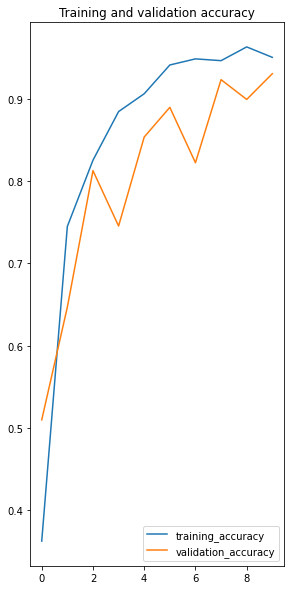

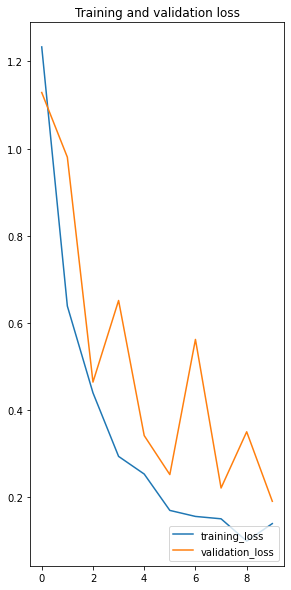

In [69]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='training_accuracy')
plt.plot(range(10),val_acc,label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')
 
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(10),loss,label='training_loss')
plt.plot(range(10),val_loss,label='validation_loss')
plt.legend(loc='lower right')
plt.title('Training and validation loss')

first image to predict
actual label : Grape___Black_rot
1/1 [==============================] - 7s 7s/step


<IPython.core.display.Javascript object>

predicted label: Grape___Black_rot


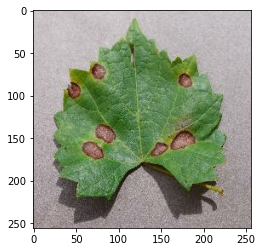

In [70]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label :',class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print('predicted label:',class_names[np.argmax(batch_prediction[0])])
    
    

In [ ]:
# write function for above

In [76]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    
    confidence=round(100*(np.argmax(predictions[0])),2)
    
    return predicted_class,confidence
                     

1/1 [==============================] - 2s 2s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 2s 2s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 2s 2s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 2s 2s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 2s 2s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

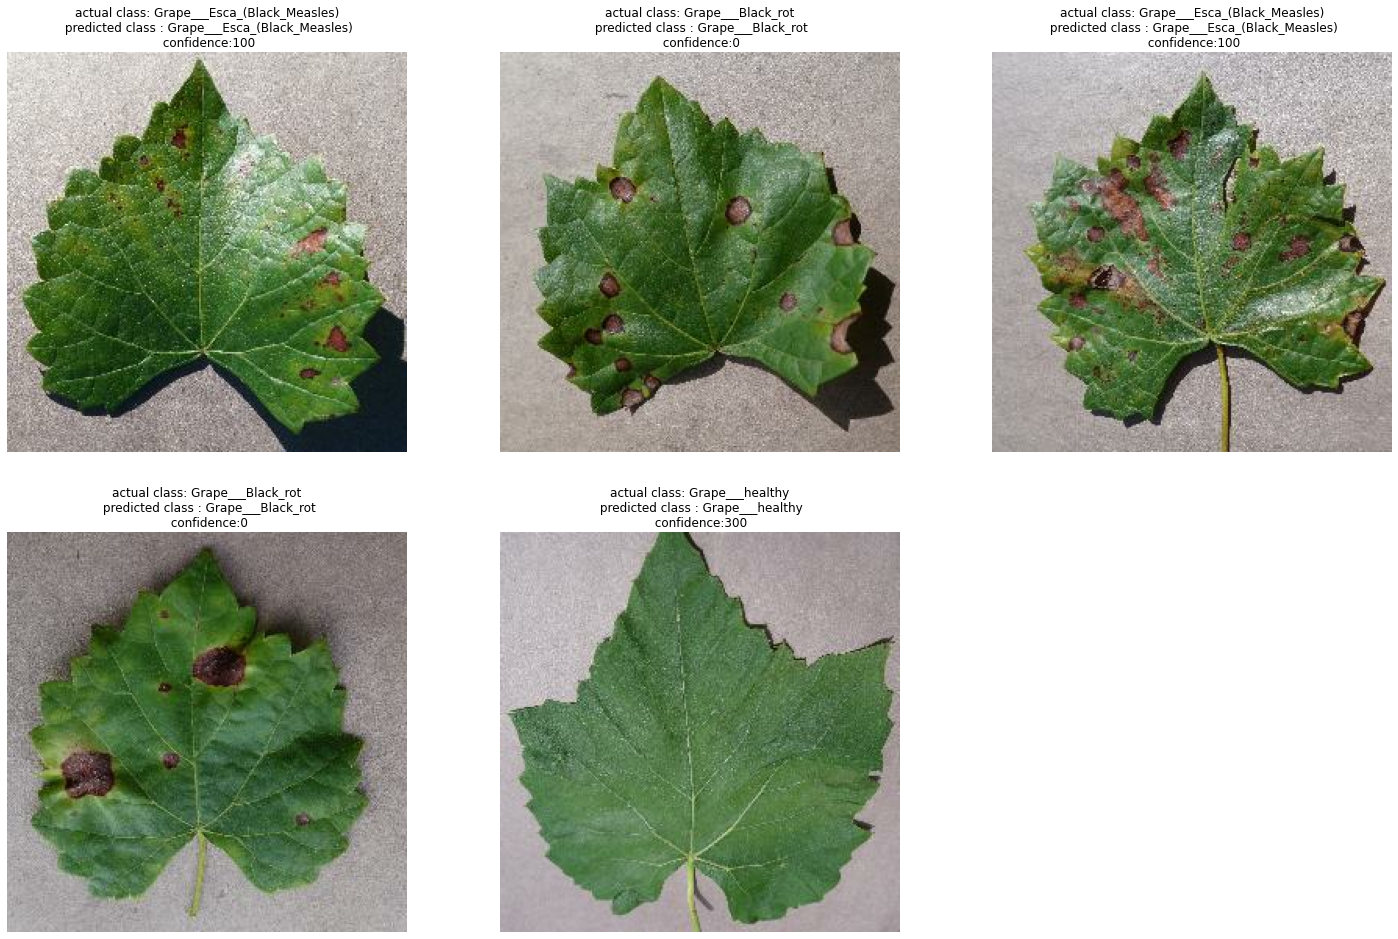

In [80]:
plt.figure(figsize=(25,25))
for images,labels in test_ds.take(1):
    for i in range(5):
        
        ax=plt.subplot(3,3,i+1)
        
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f'actual class: {actual_class}\n predicted class : {predicted_class}\n confidence:{confidence}')
        

In [81]:
# save models in directory
model_version=3
model.save(f'..\models\models{model_version}')

INFO:tensorflow:Assets written to: ..\models\models3\assets


INFO:tensorflow:Assets written to: ..\models\models3\assets


In [82]:
import os
os.getcwd()

'C:\\Users\\welcome\\Desktop\\grapevine_project'